## Data Description

Bigmart is a big supermarket chain, with stores all around the country. They have to create a model that can predict sales per product for each store. The data scientists at BigMart have collected 2013 data of sales for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: We'll use this file for the model building purpose. 

- bigdatamart_Test.csv: we'll use this file for getting predictions from the trained model. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import pickle

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [99]:
df_train= pd.read_csv(r"bigdatamart_train.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [67]:
df_test=pd.read_csv(r"bigdatamart_test.csv")
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## EDA

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [69]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Value counts for each column

In [70]:
df_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [71]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Univariate Analysis

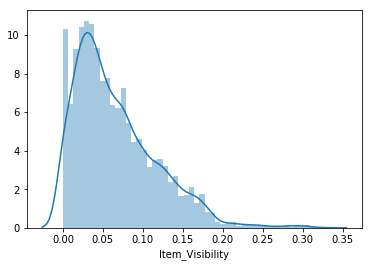

In [72]:
sns.distplot(df_train["Item_Visibility"])

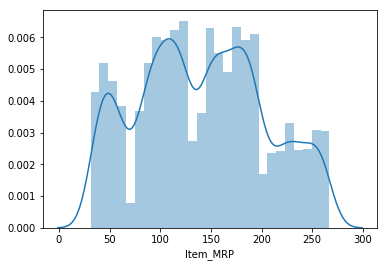

In [73]:
sns.distplot(df_train["Item_MRP"])

The continuous numeric data here is not normally distributed.

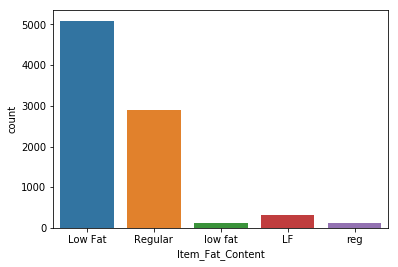

In [74]:
sns.countplot(x="Item_Fat_Content", data=df_train)

Item_Fat_Content feature has categorised low fat category as "Low Fat", "low fat" and "LF" whereas, regular category as "Regular" and "reg".

In [100]:
df_train["Item_Fat_Content"]=df_train["Item_Fat_Content"].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"})

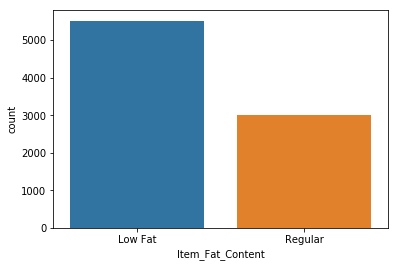

In [76]:
sns.countplot(x="Item_Fat_Content", data=df_train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

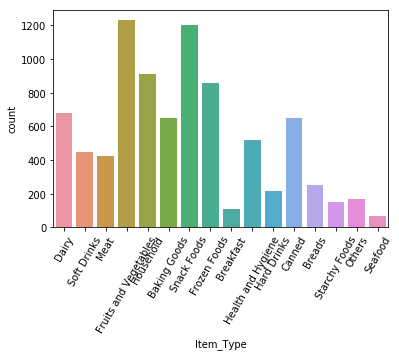

In [77]:
sns.countplot(x="Item_Type", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

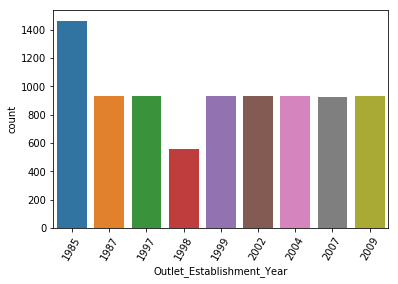

In [78]:
sns.countplot(x="Outlet_Establishment_Year", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

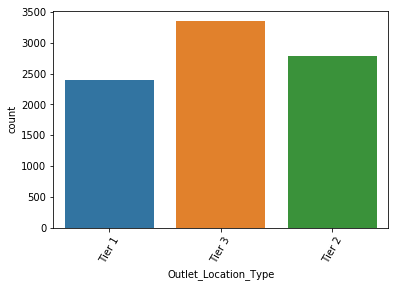

In [79]:
sns.countplot(x="Outlet_Location_Type", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

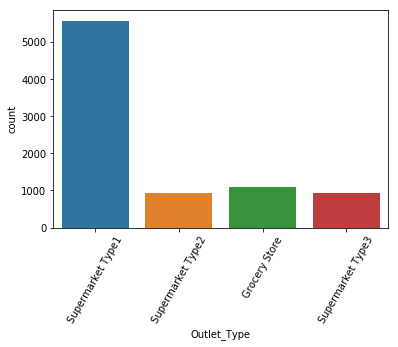

In [80]:
sns.countplot(x="Outlet_Type", data=df_train)
plt.xticks(rotation=60)

#### Dealing with null values

In [101]:
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(),inplace=True)

In [102]:
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Since number of medium outlets is high so we'll replace all null values with "Medium"

In [103]:
df_train["Outlet_Size"].fillna("Medium",inplace=True)

We will now use label encoder to encode each string variable

In [104]:
lab_encode=LabelEncoder()
col=["Item_Identifier","Outlet_Type","Outlet_Location_Type","Item_Type","Item_Fat_Content","Outlet_Size","Outlet_Identifier"]
for i in col:
    df1=lab_encode.fit_transform(df_train[i])
    df_train[i]=df1
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Correlation

In [85]:
df_train.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


#### Plotting of Heatmap

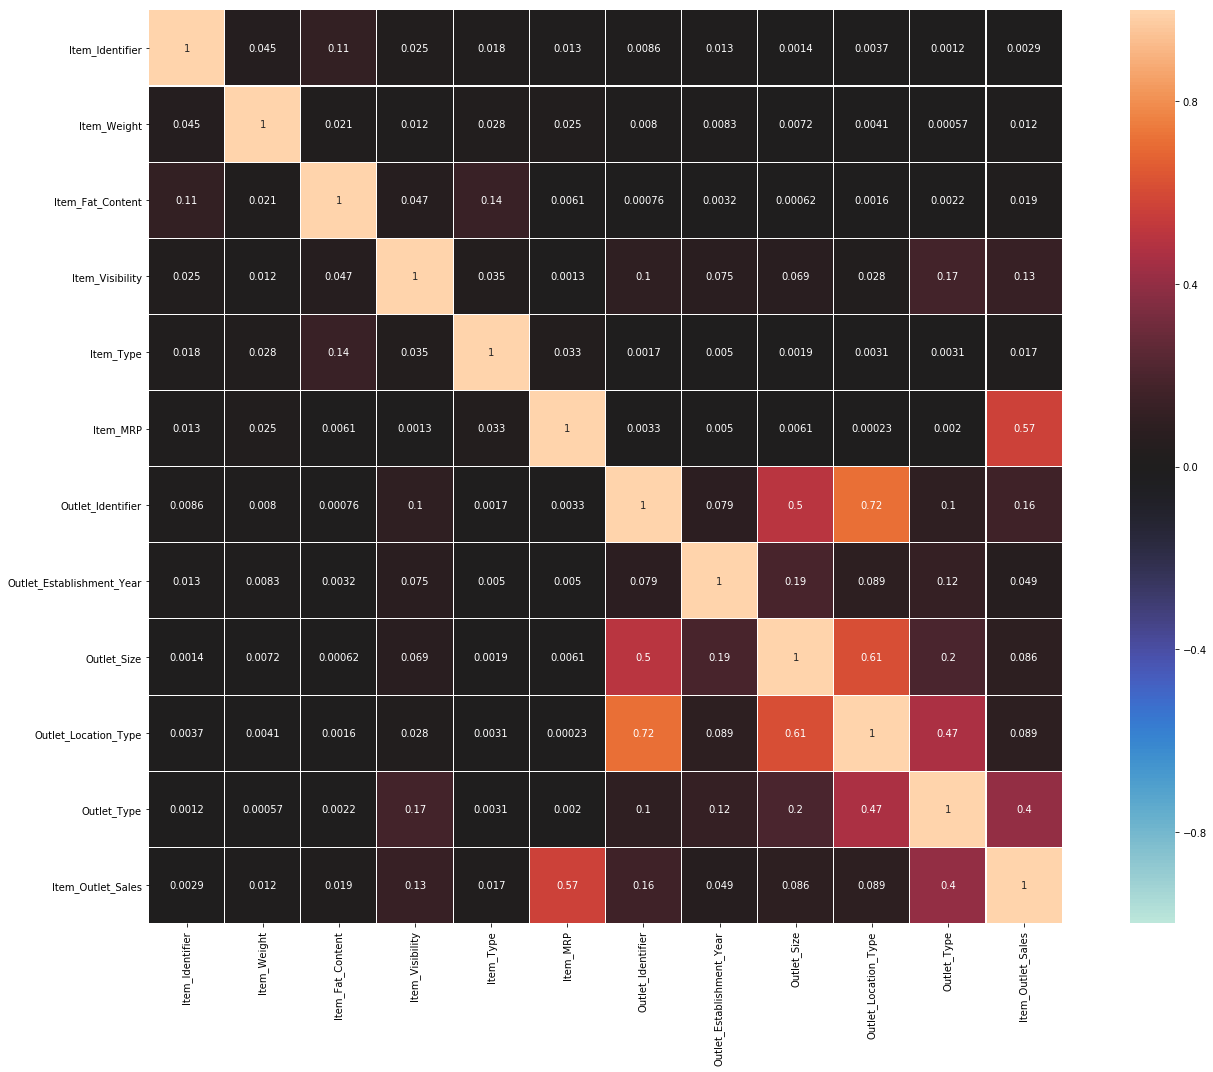

In [86]:
df_corr= df_train.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

We observe both positive as well as negative correlation with sales in outlet.Item Identifier has 0.2% positive correlation, Item weight has 1.15% positive correlation, Item fat content has 1.9% positive correlation, Item visibility has 12.89% negative correlation, Item type has 1.7% positive correlation, Item MRP has 56.75% positive correlation, Outlet Identifier has 16.23% positive correlation, Establishment year of outlet has 5% negative correlation, Outlet Size is 17% negatively correlated, Outlet Location type is 9% positively correlated and Outlet Type is 40% positively correlated 

Minimun Corrlation: Item identifier

Maximum Correlation: Item MRP

### Checking for outliers

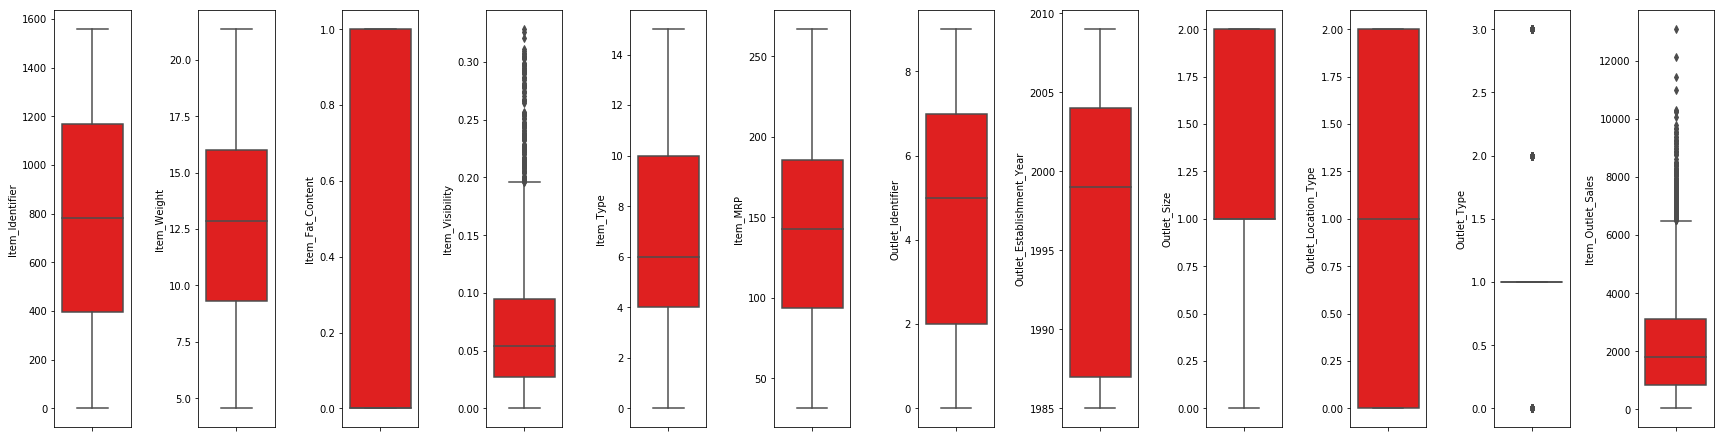

In [87]:
collist=df_train.columns.values
plt.figure(figsize=(40,90))
for i in range(0,len(collist)):
    plt.subplot(15,20,i+1)
    sns.boxplot(df_train[collist[i]],color='red',orient='v')
    plt.tight_layout()

Only Item visibility feature has outliers but it also has high correlation and we won't loose this feature. Now we'll check for normal distribution of data

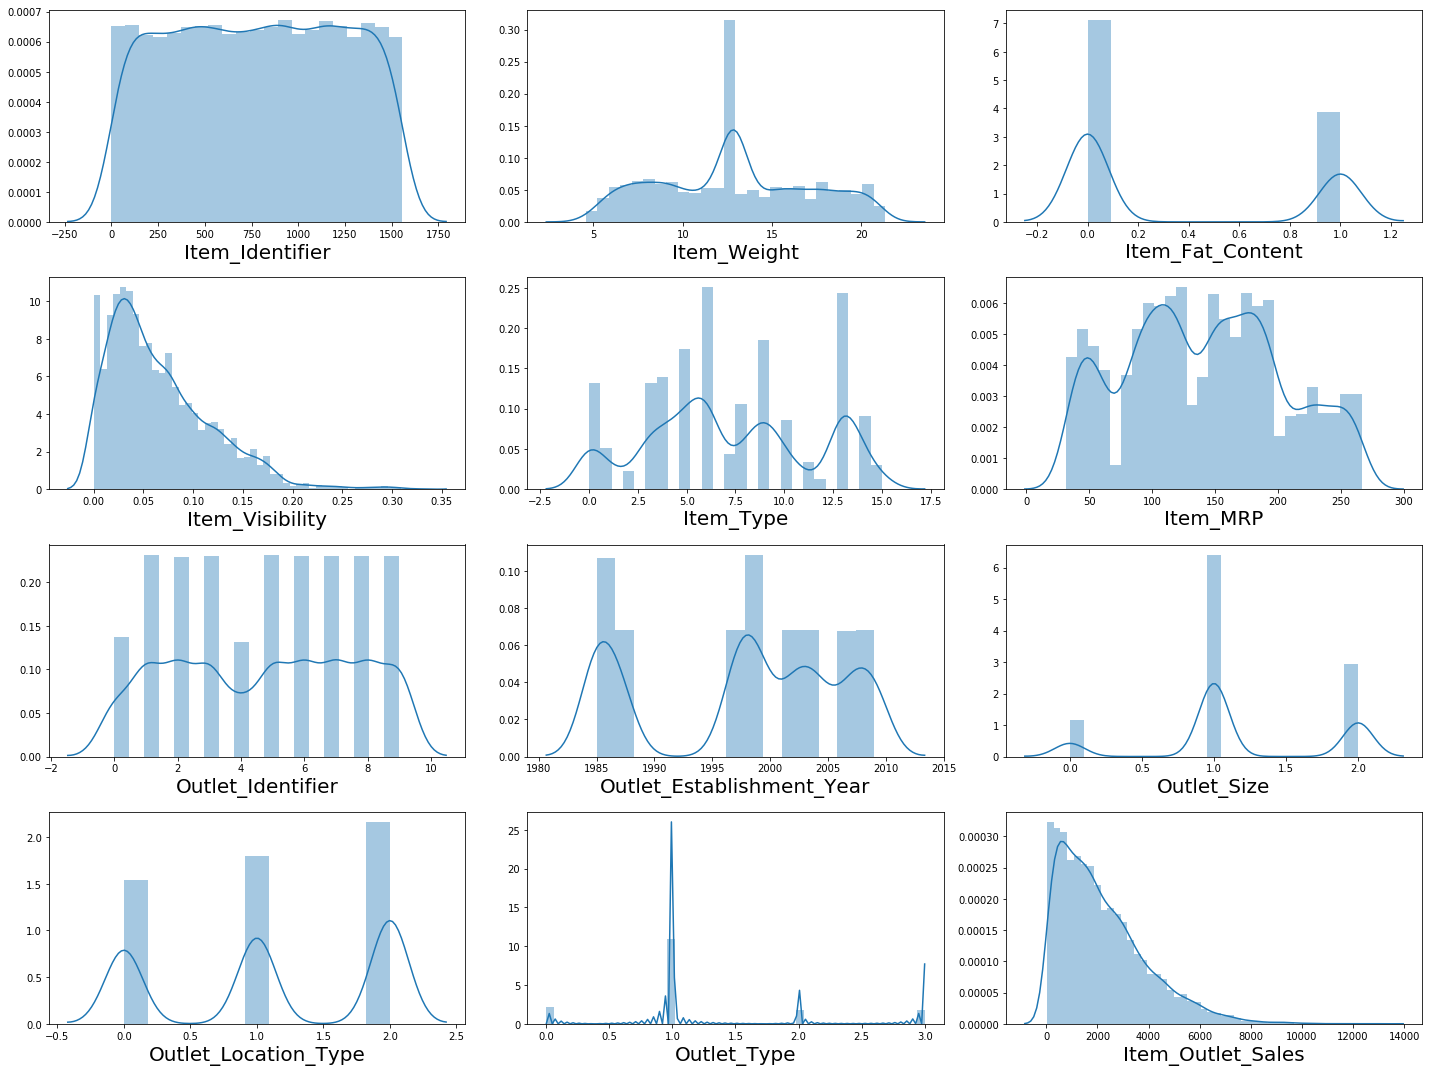

In [88]:
## checking for Normal Distribution of curve
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for column in df_train:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

We observe here that our continuous data is also not normally distributed

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Cleaning

We don't observe much relationship between Item identifier and sales so we'll drop that column

In [106]:
from scipy import stats
z=np.abs(stats.zscore(df_train))
index=(np.where(z>3)[0])
df_new=df_train.drop(df_train.index[index])
df_new.shape

(8338, 12)

In [107]:
X=df_train.drop(columns=["Item_Outlet_Sales"])
y=df_train["Item_Outlet_Sales"]

In [108]:
# Scaling data
scaler= StandardScaler()
x_scaled= scaler.fit_transform(X)

In [109]:
## now we will check formulticolinearity
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']=X.columns
vif

,vif,Features
0,1.017513,Item_Identifier
1,1.003784,Item_Weight
2,1.036510,Item_Fat_Content
3,1.065222,Item_Visibility
4,1.023858,Item_Type
5,1.002118,Item_MRP
6,4.149090,Outlet_Identifier
7,1.082139,Outlet_Establishment_Year
8,1.714450,Outlet_Size
9,5.865154,Outlet_Location_Type


In [110]:
df_train=df_train.drop(columns=["Outlet_Location_Type"],axis=1)

In [111]:
X=df_train.drop(columns=["Item_Outlet_Sales"])
y=df_train["Item_Outlet_Sales"]
x_scaled= scaler.fit_transform(X)

We'll now use power transform to remove skewness of data

In [112]:
X.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Type                  0.927438
dtype: float64

In [113]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

## Building Model

In [114]:
# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=355)

#### Linear Regression

In [117]:
lm= LinearRegression()
lm.fit(x_train,y_train)
y_pred= lm.predict(x_test)
lm.score(x_test,y_test)

0.5295767835485656

#### KNeighboursRegressor

In [118]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
knn.score(x_test,y_test)

0.527579509239805

#### DecisionTreeRegressor

In [119]:
dt= DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
dt.score(x_test,y_test)

0.1717636290111929

#### SupportVectorRegressor

In [120]:
svr= SVR()
svr.fit(x_train,y_train)
y_pred= svr.predict(x_test)
svr.score(x_test,y_test)

0.046341806608970915

We observe a very low accuracy in models so we'll use Random Forest Regressor 

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
clf= RandomForestRegressor()
clf.fit(x_train,y_train)
y_pred= clf.predict(x_test)
clf.score(x_test,y_test)

0.5700856108778674

Now we will use Hyper parametric tuning in random forest model

In [123]:
clf= RandomForestRegressor()
params={'n_estimators':[40,60], 'criterion':['mae','mse'],
       'max_depth':[10], 'min_samples_split':[2,4],
       'min_samples_leaf':[1,2]}
grd=GridSearchCV(clf,param_grid=params)
grd.fit(x_train,y_train)
print('best params=>',grd.best_params_)

best params=> {'criterion': 'mae', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 60}


In [124]:
clf= grd.best_estimator_
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [125]:
print("R2 Score = ",clf.score(x_test,y_test))

R2 Score =  0.5995858534868631


In [126]:
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Mean Squared Error=  1151427.5109382134


Now we will convert our test data in the same format as we did to model train data.

In [127]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Item Weight and outlet size has null values so we will now use the same technique to fill missing values.

In [128]:
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(),inplace=True)

In [129]:
df_test["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Since number of medium outlets is high so we'll replace all null values with "Medium"

In [130]:
df_test["Outlet_Size"].fillna("Medium",inplace=True)

In [131]:
df_test["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Item_Fat_Content feature has categorised low fat category as "Low Fat", "low fat" and "LF" whereas, regular category as "Regular" and "reg".

In [132]:
df_test["Item_Fat_Content"]=df_test["Item_Fat_Content"].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"})

We will now use label encoder to encode each string variable

In [133]:
lab_encode=LabelEncoder()
col=["Item_Identifier","Outlet_Type","Outlet_Location_Type","Item_Type","Item_Fat_Content","Outlet_Size","Outlet_Identifier"]
for i in col:
    df1=lab_encode.fit_transform(df_test[i])
    df_test[i]=df1
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [134]:
df_test=df_test.drop(columns=["Outlet_Location_Type"], axis=1)

In [135]:
test_scaled= scaler.fit_transform(df_test)

In [136]:
test=power_transform(test_scaled,method='yeo-johnson')

In [137]:
y_pred= clf.predict(test)

### Saving Model

In [138]:
filename= "BigMartSalesData.pickle"
pickle.dump(clf,open(filename,'wb'))